In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

              unit,na_item,geo\time   Country   2005   2006   2007   2008  \
0   PC_EU27_2020_MPPS_CP,NLPR_HW,AT   Austria  117.5  117.8  116.8  116.3   
1  PC_EU27_2020_MPPS_CP,NLPR_PER,AT   Austria  122.2  121.3  119.5  118.5   
2   PC_EU27_2020_MPPS_CP,NLPR_HW,BE   Belgium  142.8  139.9  138.0  136.2   
3  PC_EU27_2020_MPPS_CP,NLPR_PER,BE   Belgium  133.6  132.1  130.4  127.9   
4   PC_EU27_2020_MPPS_CP,NLPR_HW,BG  Bulgaria   37.6   37.5   38.8   39.5   

    2009   2010   2011   2012   2013   2014   2015   2016   2017   2018  \
0  117.5  115.6  115.1  118.0  117.9  118.1  119.7  119.5  117.5  117.8   
1  118.3  115.7  115.6  118.1  117.4  117.0  117.4  117.8  115.8  116.5   
2  136.8  138.0  134.0  135.2  134.7  136.1  136.8  136.5  134.0  133.5   
3  128.7  130.4  128.0  130.2  130.3  131.5  131.7  130.9  129.6  129.3   
4   40.1   41.9   42.9   44.1   42.9   44.1   44.5   45.8   45.9   47.2   

    2019   2020  Unnamed: 18  
0  115.9  117.4          NaN  
1  115.5  114.5         

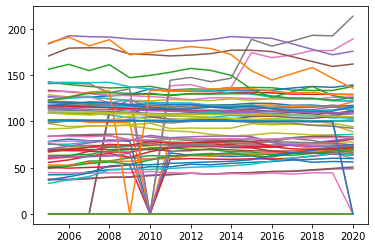

[[ 1.     0.259  0.134  0.511  0.137  0.148  0.41   0.292  0.078  0.019
   0.04   0.131  0.037  0.036 -0.399 -0.405 -0.216 -0.314  0.137  0.052
   0.238  0.247 -0.421 -0.406  0.009]
 [ 0.259  1.     0.712  0.624 -0.823 -0.813 -0.294 -0.456 -0.625 -0.737
  -0.876 -0.817 -0.893 -0.887  0.56   0.508  0.752  0.727  0.801  0.765
   0.592  0.615 -0.488 -0.379 -0.797]
 [ 0.134  0.712  1.     0.674 -0.657 -0.62  -0.721 -0.821 -0.482 -0.531
  -0.582 -0.482 -0.714 -0.708  0.414  0.556  0.809  0.692  0.588  0.625
   0.168  0.166 -0.361 -0.28  -0.733]
 [ 0.511  0.624  0.674  1.    -0.334 -0.339 -0.153 -0.33  -0.439 -0.441
  -0.3   -0.203 -0.456 -0.438 -0.084 -0.093  0.405  0.404  0.566  0.52
   0.065  0.086 -0.555 -0.448 -0.602]
 [ 0.137 -0.823 -0.657 -0.334  1.     0.995  0.556  0.625  0.744  0.865
   0.945  0.888  0.96   0.953 -0.857 -0.807 -0.798 -0.794 -0.61  -0.664
  -0.391 -0.409  0.112  0.001  0.683]
 [ 0.148 -0.813 -0.62  -0.339  0.995  1.     0.523  0.605  0.766  0.883
   0.94   0.892  0.

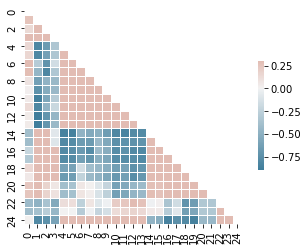

TIME
Belgium                                             37.010714
Bulgaria                                            40.826786
Czechia                                             40.564286
Denmark                                             33.721429
Germany (until 1990 former territory of the FRG)    35.226786
Estonia                                             38.528571
Ireland                                             35.746429
Greece                                              42.037500
Spain                                               38.026786
France                                              37.514286
Croatia                                             39.832143
Italy                                               37.283929
Cyprus                                              39.546429
Latvia                                              38.919643
Lithuania                                           38.498214
Luxembourg                                          37.339286
Hun

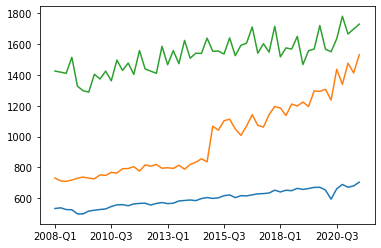

In [42]:
# %%
#coding utf8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# %%
def load_data():
    args = []
    prod_df = pd.read_csv('../data/productivity.csv')
    prod_new_df = pd.read_csv('../data/productivity_new.csv')
    sentiment_df = pd.read_csv('../data/sentiment.csv')
    hours_worked_df = pd.read_csv('../data/lfsa_ewhun2_1_Data.csv')
    productivity_df = pd.read_csv('../data/GDP_per_quarter.csv') 
    unem_df = pd.read_csv('../data/unem.csv')
    covid_df = pd.read_csv('../data/DataPerWeek.csv')
    unem_df.fillna(0)
    productivity_df.fillna(0)
    sentiment_df.fillna(0)
    prod_df.fillna(0)
    covid_df.fillna(0)
    args += [prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df]
    return args

# %%
args = load_data()
prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df = args
for i in np.linspace(2005, 2020, 16, endpoint=True):
    prod_df[[str(int(i))]] = prod_df[[str(int(i))]].apply(pd.to_numeric, errors="coerce")
print(prod_df.head(), sentiment_df.head(), hours_worked_df.head(), prod_new_df.head(), productivity_df.head(), unem_df.head(), covid_df.head())

#%%
prod_data = prod_df.iloc[0:71, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float64).T
time_data = np.repeat(np.array([np.linspace(2005, 2020, 16)]).transpose(), 71, 1)
plt.plot(time_data, prod_data)
plt.show()

#%%
corr = np.round(np.corrcoef(prod_df.iloc[0:25, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float16)), 3)
mask = np.triu(np.ones_like(corr, dtype=bool))
print(corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#%%
prod_df.head(), productivity_df.head()

#%%
def load_df(file_name):
    df = pd.read_excel(file_name, sheet_name='Sheet 1')
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df.replace(':', np.nan, inplace=True)
    df.index = df.iloc[:, 0]
    df.drop(df.columns[[0]], axis=1, inplace=True)
    for i in df.columns[:]:
        df[i] = df[i].apply(pd.to_numeric, errors="coerce")
    df.interpolate(method='linear', inplace=True, axis = 1)
    return df

def create_per_employeer(GDP_df, HW_df, employees_df):
    ''' This is a function to create a dataframe with the per-employee GDP and per hour worked '''
    cols =(list(set(GDP_df.columns) and set(employees_df.columns) and set(HW_df.columns)))
    cols.sort()
    idx = cols.pop()
    per_employee_df = pd.DataFrame(index=GDP_df.index, columns=cols)
    per_HW_df = pd.DataFrame(index=GDP_df.index, columns=cols)
    for i in cols:
        per_employee_df[i] = GDP_df[i]/employees_df[i]
        per_HW_df[i] = per_employee_df[i]/HW_df[i]
    return per_employee_df, per_HW_df

GDP_df =  load_df('../data/GDP_per_quarter_2.xlsx') * 1e6
HW_df = load_df('../data/hours_worked.xlsx')
employees_df = load_df('../data/Employees.xlsx') * 1e3
per_employee_df, per_HW_df = create_per_employeer(GDP_df, HW_df, employees_df)

print(HW_df.mean(axis=1), HW_df.std(axis=1))

per_HW_df.iloc[[4,6,15], :].T.plot(legend = False)
print(per_HW_df.index)
#%%
#reg = LinearRegression().fit(np.linspace(0, len(HW_df.columns), len(HW_df.columns), endpoint=False).reshape(-1, 1), HW_df.iloc[:, 1]

In [43]:
inf = pd.read_csv('../data/Quarterly_infilation.csv')
infilation = pd.DataFrame(inf)
infilation_new =infilation.drop(['SUBJECT', 'MEASURE','FREQUENCY','Flag Codes'], axis=1)
infilation_new

,LOCATION,INDICATOR,TIME,Value
0,AUT,CPI,2000-Q1,1.576597
1,AUT,CPI,2000-Q2,2.111587
2,AUT,CPI,2000-Q3,2.858183
3,AUT,CPI,2000-Q4,2.828739
4,AUT,CPI,2001-Q1,2.780696
...,...,...,...,...
2283,LTU,CPI,2020-Q4,0.527013
2284,LTU,CPI,2021-Q1,0.833219
2285,LTU,CPI,2021-Q2,3.235482
2286,LTU,CPI,2021-Q3,5.414587


In [44]:
df = infilation_new.pivot_table('Value', ['LOCATION', 'INDICATOR'], 'TIME')
df

,TIME,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,2001-Q3,2001-Q4,2002-Q1,2002-Q2,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4
LOCATION,INDICATOR,,,,,,,,,,,,,,,,,,,,,
AUT,CPI,1.576597,2.111587,2.858183,2.828739,2.780696,3.082184,2.609017,2.136527,1.965924,1.785135,...,1.394612,1.318681,1.871677,1.043970,1.413601,1.203881,1.337793,2.508361,3.133333,4.072848
BEL,CPI,1.986544,2.318959,3.012919,2.854446,2.184087,2.946764,2.525762,2.220183,2.735005,1.343232,...,1.162466,0.541522,1.041347,0.547887,0.818165,0.556967,0.535068,1.439878,2.619981,5.167534
CHE,CPI,1.563958,1.607336,1.483809,1.579184,1.016693,1.504252,1.025491,0.413834,0.561760,0.689405,...,0.259324,-0.076527,-0.126142,-1.220927,-0.862000,-0.689605,-0.431098,0.494460,0.834255,1.435084
CZE,CPI,3.511303,3.650336,3.902903,4.032258,4.042751,4.958295,5.405406,4.240766,3.841001,2.428256,...,2.836432,3.019818,3.603604,3.113440,3.309838,2.625954,2.188905,2.899851,4.123405,6.129128
DEU,CPI,1.548233,1.105409,1.376327,1.730921,1.720094,2.538071,2.017067,1.662800,1.998463,1.294745,...,1.466837,1.244813,1.637765,0.758773,-0.094280,-0.252207,1.358610,2.290555,3.900598,5.025284
DNK,CPI,3.132875,3.201980,2.725199,2.561281,2.391700,2.542764,2.396744,2.023252,2.503237,2.258202,...,0.421804,0.683594,0.616883,0.097025,0.516963,0.452635,0.709906,1.647819,1.896496,3.154168
ESP,CPI,2.919424,3.177286,3.626445,3.998560,3.790073,4.137410,3.642653,2.806834,2.503155,3.425096,...,0.312410,0.440998,0.602268,-0.658261,-0.503037,-0.718742,0.593161,2.559851,3.397224,5.811760
EST,CPI,3.158845,3.071876,4.441133,5.383023,5.890930,6.712963,6.050228,4.378333,4.323878,4.175705,...,2.199367,1.720328,1.488991,-1.151213,-0.944419,-1.132661,0.655533,3.084671,5.548609,9.337728
FIN,CPI,2.732307,2.779943,3.254649,3.395826,2.819898,3.124374,2.531141,1.850203,1.964133,1.388619,...,0.947235,0.778235,0.811741,-0.174126,0.319231,0.209144,1.046766,2.086698,2.201794,3.438865


In [45]:
df = df.rename({'AUT': 'Austria'})
df = df.rename({'BEL': 'Belgium'})
df = df.rename({'DEU': 'Germany'})
df = df.rename({'ESP': 'Spain'})
df = df.rename({'EST': 'Estonia'})
df = df.rename({'FIN': 'Finland'})
df = df.rename({'FRA': 'France'})
df = df.rename({'GRC': 'Greece'})
df = df.rename({'IRL': 'Ireland'})
df = df.rename({'ITA': 'Italy'})
df = df.rename({'LTU': 'Lithuania'})
df = df.rename({'LUX': 'Luxembourg'})
df = df.rename({'LVA': 'Latvia'})
df = df.rename({'PRT': 'Portugal'})
df = df.rename({'NLD': 'Netherlands'})
df = df.rename({'SVK': 'Slovakia'})
df = df.rename({'SVN': 'Slovenia'})
df = df.rename({'ISL': 'Iceland'})
df = df.rename({'GBR': 'United Kingdom'})
df = df.rename({'CHE': 'Switzerland'})
df = df.rename({'CZE': 'Cezch Republic'})
df = df.rename({'DNK': 'Denmark'})
df = df.rename({'HUN': 'Hungary'})
df = df.rename({'NOR': 'Norway'})
df = df.rename({'POL': 'Poland'})
df = df.rename({'SWE': 'Sweden'})


df.reset_index(inplace=True)
df

TIME,LOCATION,INDICATOR,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,2001-Q3,2001-Q4,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4
0,Austria,CPI,1.576597,2.111587,2.858183,2.828739,2.780696,3.082184,2.609017,2.136527,...,1.394612,1.318681,1.871677,1.043970,1.413601,1.203881,1.337793,2.508361,3.133333,4.072848
1,Belgium,CPI,1.986544,2.318959,3.012919,2.854446,2.184087,2.946764,2.525762,2.220183,...,1.162466,0.541522,1.041347,0.547887,0.818165,0.556967,0.535068,1.439878,2.619981,5.167534
2,Switzerland,CPI,1.563958,1.607336,1.483809,1.579184,1.016693,1.504252,1.025491,0.413834,...,0.259324,-0.076527,-0.126142,-1.220927,-0.862000,-0.689605,-0.431098,0.494460,0.834255,1.435084
3,Cezch Republic,CPI,3.511303,3.650336,3.902903,4.032258,4.042751,4.958295,5.405406,4.240766,...,2.836432,3.019818,3.603604,3.113440,3.309838,2.625954,2.188905,2.899851,4.123405,6.129128
4,Germany,CPI,1.548233,1.105409,1.376327,1.730921,1.720094,2.538071,2.017067,1.662800,...,1.466837,1.244813,1.637765,0.758773,-0.094280,-0.252207,1.358610,2.290555,3.900598,5.025284
5,Denmark,CPI,3.132875,3.201980,2.725199,2.561281,2.391700,2.542764,2.396744,2.023252,...,0.421804,0.683594,0.616883,0.097025,0.516963,0.452635,0.709906,1.647819,1.896496,3.154168
6,Spain,CPI,2.919424,3.177286,3.626445,3.998560,3.790073,4.137410,3.642653,2.806834,...,0.312410,0.440998,0.602268,-0.658261,-0.503037,-0.718742,0.593161,2.559851,3.397224,5.811760
7,Estonia,CPI,3.158845,3.071876,4.441133,5.383023,5.890930,6.712963,6.050228,4.378333,...,2.199367,1.720328,1.488991,-1.151213,-0.944419,-1.132661,0.655533,3.084671,5.548609,9.337728
8,Finland,CPI,2.732307,2.779943,3.254649,3.395826,2.819898,3.124374,2.531141,1.850203,...,0.947235,0.778235,0.811741,-0.174126,0.319231,0.209144,1.046766,2.086698,2.201794,3.438865
9,France,CPI,1.461752,1.423246,1.903914,1.913168,1.306284,2.050618,1.776798,1.404832,...,1.004443,1.085032,1.193702,0.297001,0.347421,0.076443,0.742843,1.381902,1.724740,2.718014


In [46]:
per_HW_df.reset_index(inplace=True) 

In [47]:
per_HW_df.drop([1,12,17,31,34,35,36,37,32,33,22,10],inplace=True)
per_HW_df.reset_index(inplace=True)

In [48]:
per_HW = per_HW_df.drop(['index'],axis=1)

In [49]:
per_HW_prod = per_HW.reindex([15,0,24,1,3,2,7,4,20,8,25,6,13,5,22,9,11,12,10,14,23,16,17,19,18,21])

per_HW_prod.reset_index(inplace = True)

In [50]:
per_HW_pro = per_HW_prod.drop(['index'],axis = 1)
per_HW_pro

,TIME,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,...,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3
0,Austria,537.344956,563.244566,549.679923,574.753142,535.440455,548.677465,546.810112,583.284671,546.040840,...,712.706775,706.655983,745.302950,698.560442,659.720954,696.998266,727.433366,689.959372,753.029010,755.286594
1,Belgium,611.402642,650.509000,611.189001,643.449734,609.283943,621.255617,609.988497,665.392445,616.821551,...,781.186857,751.422297,826.953821,757.363015,697.283950,740.861798,818.986723,798.488287,832.346996,810.219452
2,Switzerland,NaN,785.331876,790.029909,832.459651,799.153501,804.652910,820.638052,854.089406,860.023250,...,1182.727234,1207.948806,1232.905207,1201.968611,1177.466494,1218.527796,1230.993401,1173.572216,1231.652777,1252.826018
3,Czechia,213.788847,237.927883,249.455512,234.787323,200.832967,220.343577,232.028277,237.178025,219.683756,...,327.919628,333.933911,343.652461,311.266007,294.832550,324.634480,335.597217,319.635254,358.684483,362.109816
4,Germany (until 1990 former territory of the FRG),533.261691,537.787264,526.458031,525.027097,498.587068,498.165814,516.895246,521.901949,526.844000,...,662.946576,670.291155,670.776516,653.168535,593.935393,661.429813,689.269713,671.321564,679.806980,704.338582
5,Denmark,678.865532,702.741710,698.890381,719.966763,683.246776,694.388128,699.560334,749.470180,725.845460,...,922.540572,899.795253,928.473043,906.720783,895.945101,924.479816,962.315027,906.093079,943.762778,936.824282
6,Spain,404.288417,428.318029,407.299761,448.923237,417.554579,441.016492,422.911119,459.404170,432.763968,...,508.530716,485.840385,519.190295,470.499049,433.278550,470.792687,498.144841,469.709164,492.792130,472.956635
7,Estonia,171.701788,190.377468,182.534316,178.910157,164.867715,176.504979,169.971297,183.658263,175.466804,...,330.497382,328.107378,339.227333,302.046534,315.120648,329.468547,347.572388,323.745433,362.060103,380.556094
8,Finland,579.350013,586.306544,570.942422,621.474505,562.710294,566.491187,561.264723,623.490623,577.384773,...,744.788131,724.574777,796.554815,746.155982,728.608518,733.526419,814.915430,786.671414,812.148491,813.004471
9,France,568.928419,571.953573,549.212748,573.509524,554.414509,556.772397,541.990617,584.201462,569.643620,...,688.967836,676.998156,706.971493,659.278661,605.976591,667.280269,699.233322,692.946415,697.028246,691.564656


In [51]:
per_HW_pro['Average_Productivity']=per_HW_pro.iloc[:,1:55].mean(axis=1,skipna=True)
per_HW_pro

,TIME,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,Average_Productivity
0,Austria,537.344956,563.244566,549.679923,574.753142,535.440455,548.677465,546.810112,583.284671,546.040840,...,706.655983,745.302950,698.560442,659.720954,696.998266,727.433366,689.959372,753.029010,755.286594,638.293471
1,Belgium,611.402642,650.509000,611.189001,643.449734,609.283943,621.255617,609.988497,665.392445,616.821551,...,751.422297,826.953821,757.363015,697.283950,740.861798,818.986723,798.488287,832.346996,810.219452,707.767975
2,Switzerland,NaN,785.331876,790.029909,832.459651,799.153501,804.652910,820.638052,854.089406,860.023250,...,1207.948806,1232.905207,1201.968611,1177.466494,1218.527796,1230.993401,1173.572216,1231.652777,1252.826018,1076.055141
3,Czechia,213.788847,237.927883,249.455512,234.787323,200.832967,220.343577,232.028277,237.178025,219.683756,...,333.933911,343.652461,311.266007,294.832550,324.634480,335.597217,319.635254,358.684483,362.109816,267.622424
4,Germany (until 1990 former territory of the FRG),533.261691,537.787264,526.458031,525.027097,498.587068,498.165814,516.895246,521.901949,526.844000,...,670.291155,670.776516,653.168535,593.935393,661.429813,689.269713,671.321564,679.806980,704.338582,595.379758
5,Denmark,678.865532,702.741710,698.890381,719.966763,683.246776,694.388128,699.560334,749.470180,725.845460,...,899.795253,928.473043,906.720783,895.945101,924.479816,962.315027,906.093079,943.762778,936.824282,827.044926
6,Spain,404.288417,428.318029,407.299761,448.923237,417.554579,441.016492,422.911119,459.404170,432.763968,...,485.840385,519.190295,470.499049,433.278550,470.792687,498.144841,469.709164,492.792130,472.956635,470.142974
7,Estonia,171.701788,190.377468,182.534316,178.910157,164.867715,176.504979,169.971297,183.658263,175.466804,...,328.107378,339.227333,302.046534,315.120648,329.468547,347.572388,323.745433,362.060103,380.556094,246.184119
8,Finland,579.350013,586.306544,570.942422,621.474505,562.710294,566.491187,561.264723,623.490623,577.384773,...,724.574777,796.554815,746.155982,728.608518,733.526419,814.915430,786.671414,812.148491,813.004471,677.186683
9,France,568.928419,571.953573,549.212748,573.509524,554.414509,556.772397,541.990617,584.201462,569.643620,...,676.998156,706.971493,659.278661,605.976591,667.280269,699.233322,692.946415,697.028246,691.564656,626.323865


In [52]:
df['Average_Infilation'] = df.iloc[:,34:88].mean(axis=1,skipna=True)
df

TIME,LOCATION,INDICATOR,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,2001-Q3,2001-Q4,...,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,Average_Infilation
0,Austria,CPI,1.576597,2.111587,2.858183,2.828739,2.780696,3.082184,2.609017,2.136527,...,1.318681,1.871677,1.043970,1.413601,1.203881,1.337793,2.508361,3.133333,4.072848,1.827017
1,Belgium,CPI,1.986544,2.318959,3.012919,2.854446,2.184087,2.946764,2.525762,2.220183,...,0.541522,1.041347,0.547887,0.818165,0.556967,0.535068,1.439878,2.619981,5.167534,1.767322
2,Switzerland,CPI,1.563958,1.607336,1.483809,1.579184,1.016693,1.504252,1.025491,0.413834,...,-0.076527,-0.126142,-1.220927,-0.862000,-0.689605,-0.431098,0.494460,0.834255,1.435084,0.110816
3,Cezch Republic,CPI,3.511303,3.650336,3.902903,4.032258,4.042751,4.958295,5.405406,4.240766,...,3.019818,3.603604,3.113440,3.309838,2.625954,2.188905,2.899851,4.123405,6.129128,2.128356
4,Germany,CPI,1.548233,1.105409,1.376327,1.730921,1.720094,2.538071,2.017067,1.662800,...,1.244813,1.637765,0.758773,-0.094280,-0.252207,1.358610,2.290555,3.900598,5.025284,1.308379
5,Denmark,CPI,3.132875,3.201980,2.725199,2.561281,2.391700,2.542764,2.396744,2.023252,...,0.683594,0.616883,0.097025,0.516963,0.452635,0.709906,1.647819,1.896496,3.154168,1.331685
6,Spain,CPI,2.919424,3.177286,3.626445,3.998560,3.790073,4.137410,3.642653,2.806834,...,0.440998,0.602268,-0.658261,-0.503037,-0.718742,0.593161,2.559851,3.397224,5.811760,1.230464
7,Estonia,CPI,3.158845,3.071876,4.441133,5.383023,5.890930,6.712963,6.050228,4.378333,...,1.720328,1.488991,-1.151213,-0.944419,-1.132661,0.655533,3.084671,5.548609,9.337728,2.534528
8,Finland,CPI,2.732307,2.779943,3.254649,3.395826,2.819898,3.124374,2.531141,1.850203,...,0.778235,0.811741,-0.174126,0.319231,0.209144,1.046766,2.086698,2.201794,3.438865,1.340303
9,France,CPI,1.461752,1.423246,1.903914,1.913168,1.306284,2.050618,1.776798,1.404832,...,1.085032,1.193702,0.297001,0.347421,0.076443,0.742843,1.381902,1.724740,2.718014,1.118332


In [53]:
correl_signif = pearsonr(per_HW_pro['Average_Productivity'], df['Average_Infilation'])
correl = correl_signif[0]
correl

-0.3443368893175666